# TOA CNN Preprocessing Analysis

Here we illustrate the effects of different normalization techniques in the preprocessing of WorldView data TOA input. The reference we will be using is taken from https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py.

In [21]:
import numpy as np
import rasterio as rio
import rioxarray as rxr
import matplotlib as mpl
from matplotlib import pyplot as plt
from rasterio.plot import show, show_hist
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

## Looking at an Example Dataset

In [22]:
dataset = fetch_california_housing()
dataset['data'].shape

(20640, 8)

## Original Data

Here we plot a histogram of the features of a Tappan square.

In [70]:
filename = '/explore/nobackup/projects/3sl/data/Tappan/Tappan24_WV03_20171001_M1BS_10400100325E9500_data.tif'

window = rio.windows.Window(0, 0, 512, 512)
with rio.open(filename) as src:
    w_rgb = src.read((5,7,1), window=window)
    w = src.read(window=window)
w.shape

(8, 512, 512)

## Developed Scalers

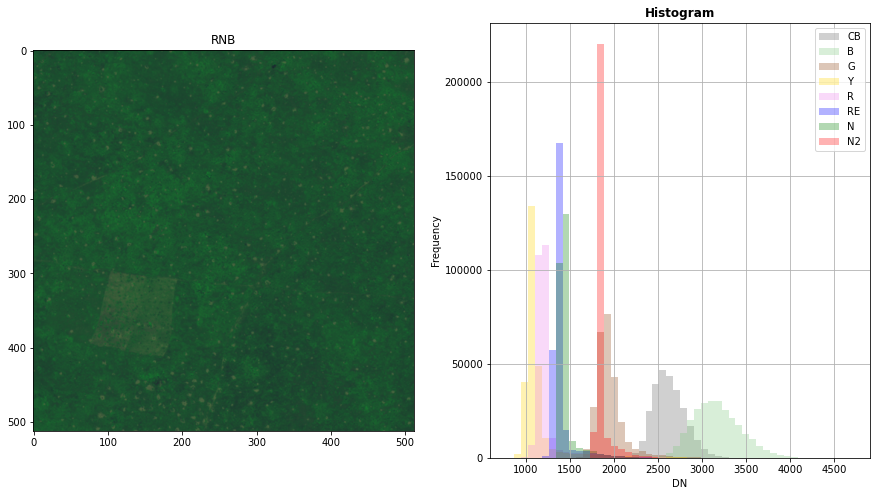

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))
show(w_rgb / 10000.0, ax=axs[0])
axs[0].set_title("RNB")
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

## StandardScaler

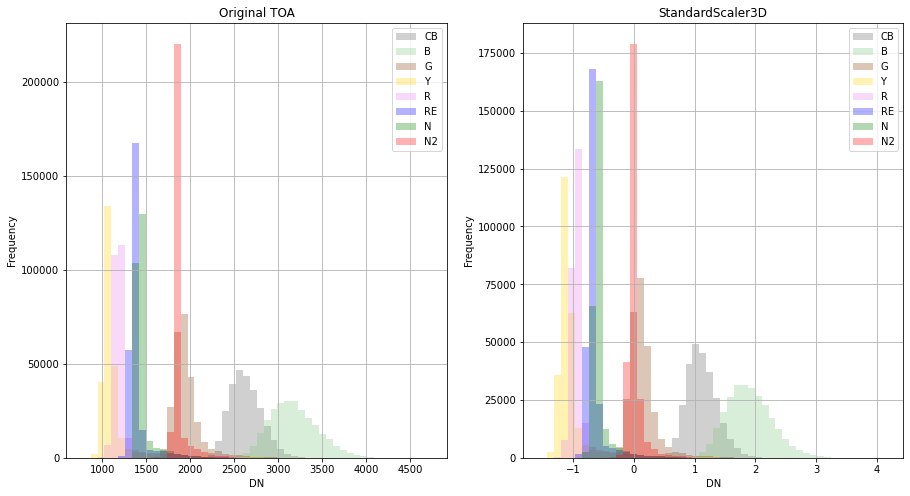

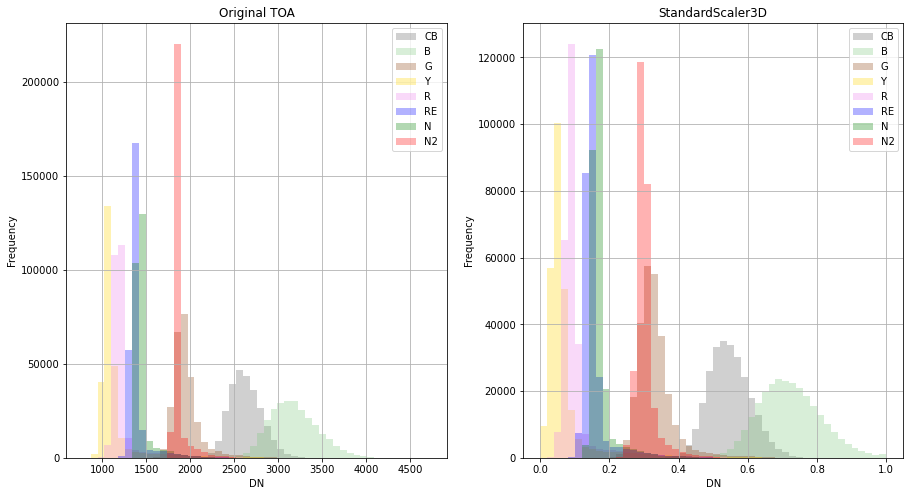

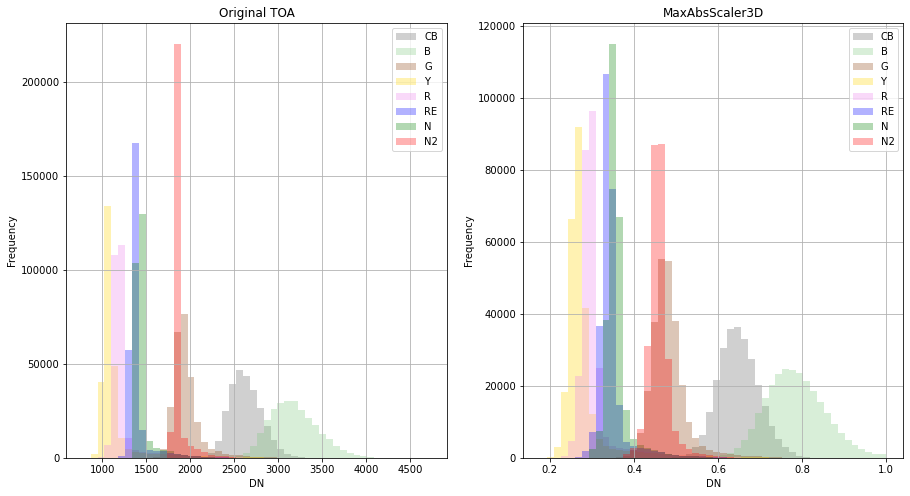

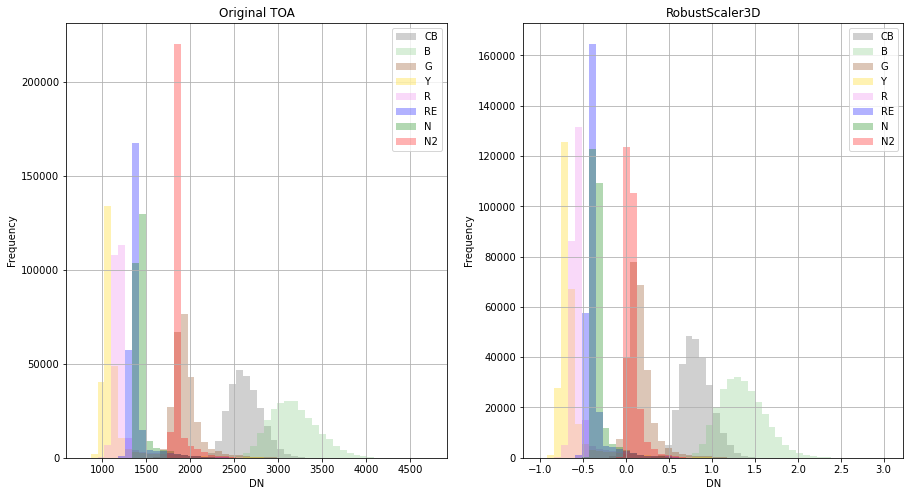

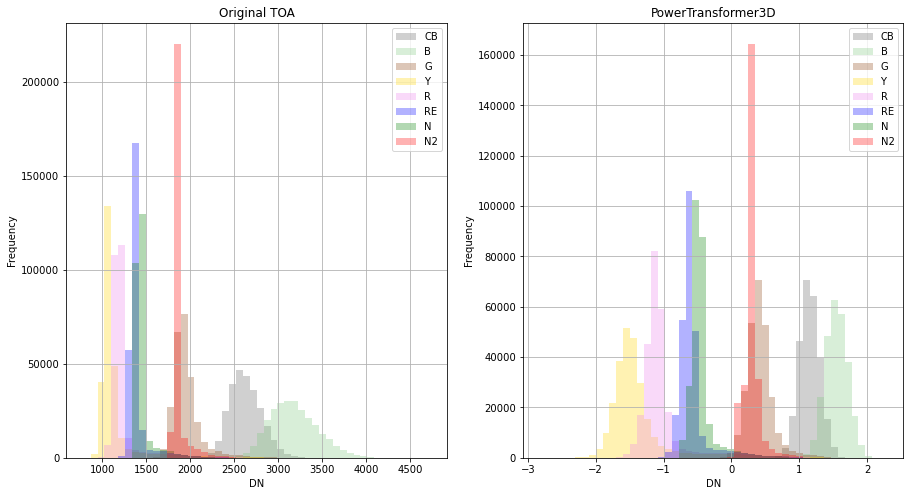

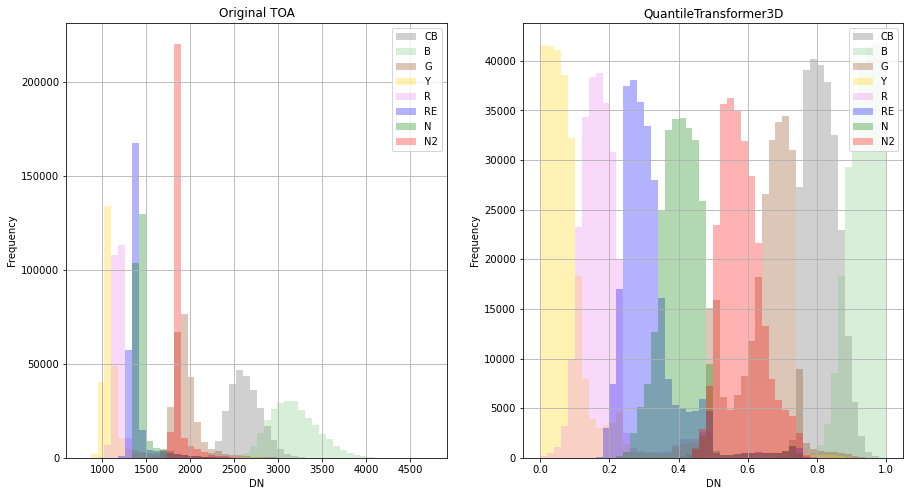

In [72]:
from sklearn.preprocessing import StandardScaler
import numpy as np

class StandardScaler3D(StandardScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

    #def fit(self, X, y=None):
    #    x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
    #    return np.reshape(super().fit(x, y=y), newshape=X.shape)

#w_test = np.moveaxis(w, 0, -1)
#w_standard_scaler = StandardScaler3D().fit_transform(w_test)
#w_standard_scaler_test = StandardScaler3D().fit(w_test)
#print(w_standard_scaler.mean(), w_standard_scaler_test.get_params())
w_standard_scaler = StandardScaler3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_standard_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("StandardScaler3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()


from sklearn.preprocessing import MinMaxScaler
import numpy as np

class MinMaxScaler3D(MinMaxScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

w_minmax_scaler = MinMaxScaler3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_minmax_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("StandardScaler3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

from sklearn.preprocessing import MaxAbsScaler
import numpy as np

class MaxAbsScaler3D(MaxAbsScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

w_maxabs_scaler = MaxAbsScaler3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_maxabs_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("MaxAbsScaler3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

from sklearn.preprocessing import RobustScaler
import numpy as np

class RobustScaler3D(RobustScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

w_robust_scaler = RobustScaler3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_robust_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("RobustScaler3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()


from sklearn.preprocessing import PowerTransformer
import numpy as np

class PowerTransformer3D(PowerTransformer):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

w_powertransformer_scaler = PowerTransformer3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_powertransformer_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("PowerTransformer3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

from sklearn.preprocessing import QuantileTransformer
import numpy as np

class QuantileTransformer3D(QuantileTransformer):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

w_quantiletransformer_scaler = QuantileTransformer3D().fit_transform(w)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(w_quantiletransformer_scaler, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("QuantileTransformer3D")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

In [73]:
image = np.moveaxis(w.copy(), 0, -1)
for i in range(image.shape[-1]):
    image[:, :, i] = (image[:, :, i] - np.mean(image[:, :, i])) / \
        (np.std(image[:, :, i]) + 1e-8)

In [74]:
image.shape

(512, 512, 8)

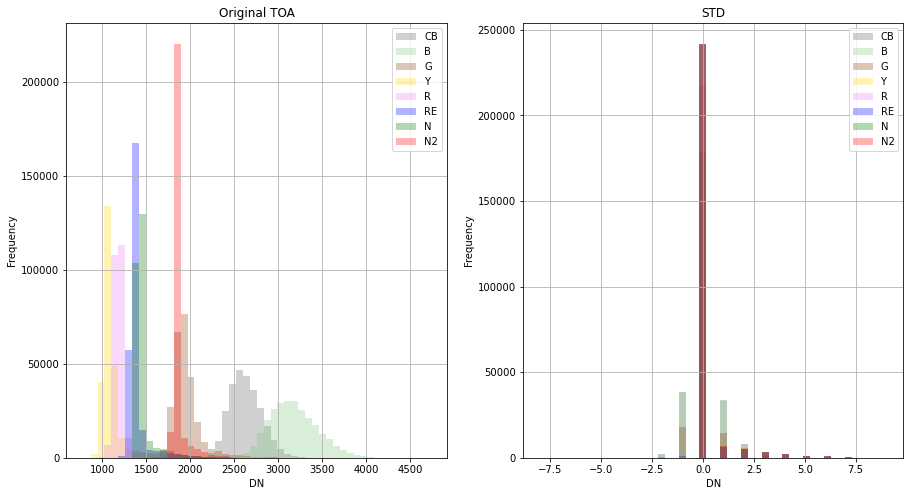

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))
show_hist(w, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[0])
axs[0].set_title("Original TOA")
axs[0].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")

show_hist(np.moveaxis(image.copy(), -1, -0), bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=axs[1])
axs[1].set_title("STD")
axs[1].legend(["CB", "B", "G", "Y", "R", "RE", "N", "N2"], loc="upper right")
plt.show()

In [87]:
raster = rxr.open_rasterio(filename)
raster_masked = raster.where(raster != raster.attrs['_FillValue'])
raster_masked.mean(dim=('y', 'x'), skipna=True)


<xarray.DataArray (band: 8)>
array([1898.56589572, 1516.41023208, 1464.1775886 , 1332.0541038 ,
       1268.89469468, 2054.49995592, 3305.85955404, 2654.99256064])
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8
    spatial_ref  int64 0

In [84]:
raster.attrs['_FillValue']

-10001.0

In [96]:
%%time

from glob import glob

filenames= glob('/explore/nobackup/projects/3sl/data/Tappan/*_data.tif')
print(len(filenames))

means = list()
stds = list()

for filename in filenames[:5]:
    
    raster = rxr.open_rasterio(filename) #, chunks={'x': 'auto', 'y': 'auto', 'band': 'auto'}
    raster_masked = raster.where(raster != raster.attrs['_FillValue'])
    mean = raster_masked.mean(dim=('y', 'x'), skipna=True).values
    std = raster_masked.std(dim=('y', 'x'), skipna=True).values
    
    print(np.array([filename]))
    print(np.concatenate((np.array([filename]), mean)))
    
    
    mean_df = pd.DataFrame(my_array, columns = ['Name','Age','Birth Year','Graduation Year'])

    
    #means.append(mean, std)


272
['/explore/nobackup/projects/3sl/data/Tappan/Tappan09_WV03_20190203_M1BS_1040010047CA0300_data.tif']
['/explore/nobackup/projects/3sl/data/Tappan/Tappan09_WV03_20190203_M1BS_1040010047CA0300_data.tif'
 '2906.57931432' '2812.42819196' '2721.59441536' '2820.94252024'
 '3072.96332388' '3111.0983016' '3474.87200452' '3196.33948812']
['/explore/nobackup/projects/3sl/data/Tappan/Tappan01_WV02_20161026_M1BS_103001005FAB0500_data.tif']
['/explore/nobackup/projects/3sl/data/Tappan/Tappan01_WV02_20161026_M1BS_103001005FAB0500_data.tif'
 '1366.0285784' '1089.03728372' '984.48542284' '876.12120476'
 '851.4295956' '1493.88351632' '2510.84732204' '2038.6258338']
['/explore/nobackup/projects/3sl/data/Tappan/Tappan01_WV02_20121014_M1BS_103001001B793900_data.tif']
['/explore/nobackup/projects/3sl/data/Tappan/Tappan01_WV02_20121014_M1BS_103001001B793900_data.tif'
 '1486.3258561766309' '1099.9594053904073' '1039.9873107262656'
 '879.967098789871' '797.5320249147803' '1733.4982266766572'
 '3006.090479